<a href="https://colab.research.google.com/github/BDBandito/foreveryone1/blob/main/HA01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HA01-2
### Plotting the binding energy curve

Please give your name below:

In [ ]:
name='Oskar Andersson'

The minimum energy required to disassemble the nucleus of an atom into its components is the binding energy. In this exercise you are going to compute the binding energy per nucleon for several nuclides in two ways:

1. based on the relative atomic mass of the nuclides
2. based on a semi-empirical formula.

If we substract the mass of the nucleus from the mass of the nucleons and express it in energy unit we get the binding energy:

$B(A,Z)=[Z\cdot m_p+(A-Z)\cdot m_n-M(A,Z)]c^2$

For a given nuclide one can estimate the binding energy with the semi-empirical Bethe–Weizsäcker formula, which has various forms in literature. Here you can use the following form:

$B(A,Z)=15.75A-94.8\frac{(A/2 - Z)^2}{A}-17.8A^{2/3}-0.71Z^2A^{-1/3}+34\delta A^{-3/4}$

where $\delta = 1$ for even-even nuclei, $\delta = -1$ for odd-odd nuclei and $\delta = 0$ otherwise.

(Note: that all terms in the formula have a physical meaning: volume term, assymmetry term, surface term, Coulomb term and pairing term. Make sure based on the text book that you understand these).

In the first formula one can express the neutron and proton mass in unified mass units (u). Also notice, that in most tabulated data (also here) you can only look up the relative atom mass of isotopes, and not the mass of the nucleus, thus the mass of the electrons needs to be taken into account as well. The reason for this is that for high Z isotopes it is difficult to remove all the electrons, so the neutral atoms are measured instead.

This exercises is a guided exercise, you will essentially need to write two lines of code, and make sure you understand the other parts.

Your task is to

1. Find out which nuclide is the most binded?
2. Discuss for which energies does the semi empirical formula give reasonable results. (You can check the literature to see what is the expectation).

Let us first define the constants, and import python libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
me=5.48579909070e-4 #u
mn=1.00866491588    #u
mp=1.007276466621   #u
muc2=931.49410242 #MeV

Then you are given the relative mass (in unified mass units) of several nuclides  (downloaded from https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl?ele=&ascii=html) as a python nested dictionary. Dictionaries are used to store data values in key:value pairs. It is basically an unorder array with "named" columns. In this case the outer keys are nuclide identifiers, and the values are also dictionaries, with the keys being Z, A and m.

In [2]:
nuclides={'H2': {'Z': 1, 'A': 2, 'm': 2.01410177812},
        'H3': {'Z': 1, 'A': 3, 'm': 3.0160492779},
        'He3': {'Z': 2, 'A': 3, 'm': 3.0160293201},
        'He4': {'Z': 2, 'A': 4, 'm': 4.002603254},
        'Li6': {'Z': 3, 'A': 6, 'm': 6.0151228874},
        'O16': {'Z': 8, 'A': 16, 'm': 15.99491461957},
        'S34': {'Z': 16, 'A': 34, 'm': 33.96786701},
        'Fe56': {'Z': 26, 'A': 56, 'm': 55.9349375},
        'Ni62': {'Z': 28, 'A': 62, 'm': 61.92834537},
        'Kr84': {'Z': 36, 'A': 84, 'm': 83.9114977282},
        'Sn119': {'Z': 50, 'A': 119, 'm': 118.90331117},
        'Ti205': {'Z': 81, 'A': 205, 'm': 204.9744278},
        'U238': {'Z': 92, 'A': 238, 'm': 238.0507884}}


If you want to access a given value, you can do this:

In [3]:
print(nuclides['U238'])

{'Z': 92, 'A': 238, 'm': 238.0507884}


Or you can go one level deeper:

In [4]:
print(nuclides['U238']['m'])

238.0507884


Now you have to implement functions to evaluate the binding energy per nucleon based on the two formulas above:

In [7]:
def BAZ(A,Z,m):
    eps= ((Z * mp) + ((A - Z) * mn) - m) * muc2
    return eps/A

def BAZ_BW(A,Z):
    N=A-Z
    if Z%2==0 and N%2==0:
        D=1
    elif Z%2!=0 and N%2!=0:
        D=-1
    else:
        D=0
    eps= (15.75 * A - 94.8 * ((A / 2 - Z) ** 2) / A - 17.8 * (A ** (2 / 3)) - 0.71 * (Z ** 2) * (A ** (-1 / 3)) + 34 * D * (A ** (-3 / 4)))

    return eps/A


Now you have to use this function for all the entries in the dictionary.

In [8]:
for nuclide in nuclides.values():
    nuclide['eps']=BAZ(nuclide['A'],nuclide['Z'],nuclide['m']) #we call the function and
    nuclide['epsBW']=BAZ_BW(nuclide['A'],nuclide['Z'])         #create new keys in the dictionary


In [ ]:
#here you can look at the values in the dictionary. just uncomment the next line
#nuclides

We create lists out of the values in the inner dictionary to make plotting simpler.

In [9]:
labels=nuclides.keys()
As = [nuclides[nucl].get('A','') for nucl in nuclides] #i create lists for plotting
Eps = [nuclides[nucl].get('eps','') for nucl in nuclides]
EpsBW = [nuclides[nucl].get('epsBW','') for nucl in nuclides]

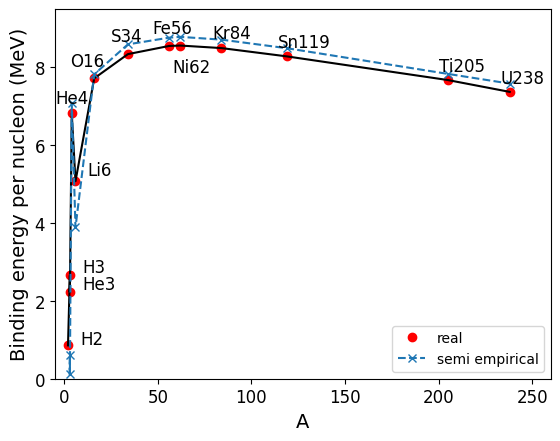

In [10]:
#nice plotting command where i made sure that the nuclide identifiers hopefully end up at the right place
import matplotlib as mpl
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
plt.figure()
plt.plot(As,Eps,'ro',label='real')
plt.plot(As,Eps,'k-')
plt.plot(As,EpsBW,'x--',label='semi empirical')
for A,E,l in zip(As,Eps,labels):
    if l=='Ni62':
        plt.annotate(l,(A-4,E*0.92),fontsize=12)
    elif l=='O16':
        plt.annotate(l,(A-13,E*1.04),fontsize=12)
    elif l in ['H2','H3','He3','Li6']:
        plt.annotate(l,(A+6.5,E*1.03),fontsize=12)
    elif l in ['He4','S34','Fe56']:
        plt.annotate(l,(A-9,E*1.04),fontsize=12)
    else:
        plt.annotate(l,(A-5,E*1.03),fontsize=12)
plt.xlabel('A',fontsize=14)
plt.ylim(0,9.5)
plt.xlim(-5,260)
plt.legend()
plt.ylabel('Binding energy per nucleon (MeV)',fontsize=14)
plt.show()
